<a href="https://colab.research.google.com/github/SHAIKKHIZAR/FML-LAB/blob/main/KmeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
import numpy as np

In [2]:
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [3]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [4]:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0], dtype=int32)

In [5]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [6]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Company_data.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [9]:
df.shape

(200, 4)

In [10]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(df[['Newspaper','Sales']])
df_scale = pd.DataFrame(scale, columns = ['Newspaper','Sales']);
df_scale.head(5)

,Newspaper,Sales
0,0.605981,0.807087
1,0.394019,0.346457
2,0.606860,0.409449
3,0.511873,0.586614
4,0.510994,0.641732


In [11]:
km=KMeans(n_clusters=2)
y_predicted = km.fit_predict(df_scale[['Newspaper','Sales']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0], dtype=int32)

In [12]:
km.cluster_centers_

array([[0.30448549, 0.68901217],
       [0.21915372, 0.34164479]])

<Axes: xlabel='Sales', ylabel='Newspaper'>

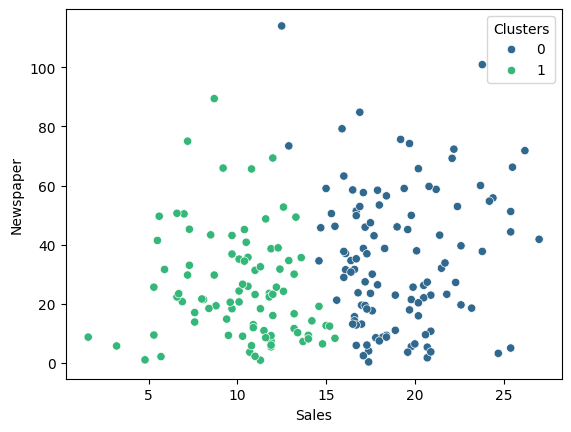

In [13]:
df['Clusters'] = km.labels_
sns.scatterplot(x="Sales", y="Newspaper",hue = 'Clusters',  data=df,palette='viridis')

In [14]:
K=range(2,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(df_scale)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

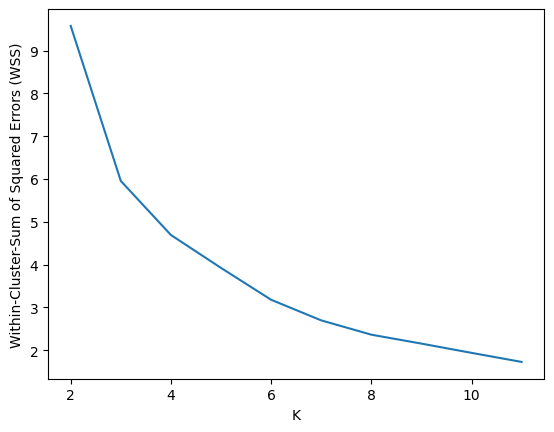

In [15]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [17]:
km=KMeans(n_clusters=5)
y_predicted = km.fit_predict(df_scale[['Newspaper','Sales']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 0, 0, 4, 4, 0, 2, 2, 2, 1, 2, 1, 0, 2, 4, 3, 0, 3, 2, 1, 4, 1,
       0, 1, 2, 1, 1, 1, 1, 0, 3, 4, 2, 1, 2, 1, 1, 4, 2, 1, 4, 4, 1, 1,
       0, 4, 2, 1, 3, 2, 4, 2, 3, 3, 1, 3, 0, 2, 3, 1, 2, 3, 1, 2, 4, 2,
       2, 2, 1, 1, 4, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 4, 2, 4, 1, 3, 2, 4,
       0, 4, 2, 2, 3, 3, 2, 4, 1, 1, 3, 4, 4, 3, 1, 1, 1, 4, 2, 2, 2, 1,
       4, 1, 1, 1, 4, 0, 2, 2, 0, 2, 4, 0, 1, 1, 3, 2, 0, 2, 1, 0, 2, 4,
       2, 4, 0, 2, 2, 3, 2, 1, 2, 3, 4, 2, 4, 2, 1, 3, 2, 2, 4, 0, 1, 4,
       1, 2, 4, 2, 0, 4, 4, 4, 1, 1, 2, 3, 2, 1, 4, 1, 2, 4, 2, 1, 1, 3,
       1, 4, 1, 1, 1, 1, 2, 3, 4, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       3, 1], dtype=int32)

<Axes: xlabel='Sales', ylabel='Newspaper'>

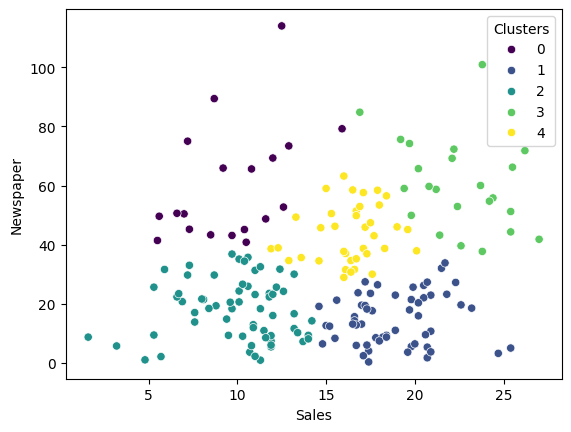

In [18]:
df['Clusters'] = km.labels_
sns.scatterplot(x="Sales", y="Newspaper",hue = 'Clusters',  data=df,palette='viridis')